# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import numpy

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/test.p'
testing_file = 'traffic-signs-data/valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape)


(34799, 32, 32, 3) (12630, 32, 32, 3) (4410, 32, 32, 3) (34799,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

n_train = len(train['labels'])

n_validation = len(valid['labels'])

n_test = len(test['labels'])

image_shape = X_train[0].shape

n_classes = len(np.unique(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 4410
Number of validation examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_valid = X_valid / 255.0

# utility functions
def plot_figures(figures, nrows = 1, ncols=1):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,image in zip(range(len(figures)), figures):
        if figures[ind].shape[-1] > 1:
            axeslist.ravel()[ind].imshow(figures[ind])
        else:
            axeslist.ravel()[ind].imshow(figures[ind], cmap = 'gray')
        axeslist.ravel()[ind].set_axis_off()
    plt.show()

0  -  Speed limit (20km/h)


1  -  Speed limit (30km/h)


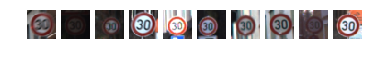

2  -  Speed limit (50km/h)


3  -  Speed limit (60km/h)


4  -  Speed limit (70km/h)


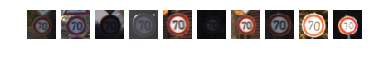

5  -  Speed limit (80km/h)


6  -  End of speed limit (80km/h)


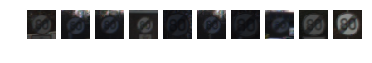

7  -  Speed limit (100km/h)


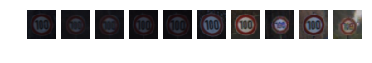

8  -  Speed limit (120km/h)


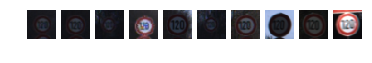

9  -  No passing


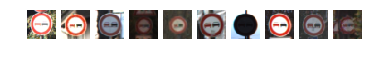

10  -  No passing for vehicles over 3.5 metric tons


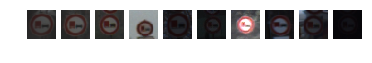

11  -  Right-of-way at the next intersection


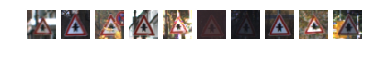

12  -  Priority road


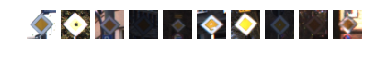

13  -  Yield


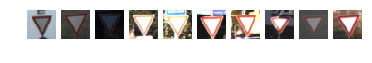

14  -  Stop


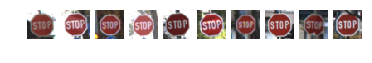

15  -  No vehicles


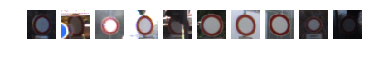

16  -  Vehicles over 3.5 metric tons prohibited


17  -  No entry


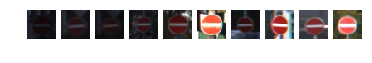

18  -  General caution


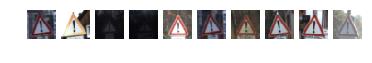

19  -  Dangerous curve to the left


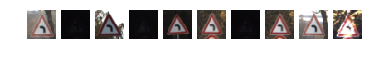

20  -  Dangerous curve to the right


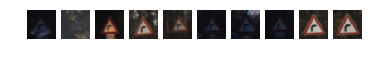

21  -  Double curve


22  -  Bumpy road


23  -  Slippery road


24  -  Road narrows on the right


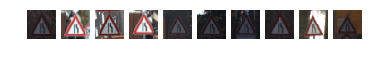

25  -  Road work


26  -  Traffic signals


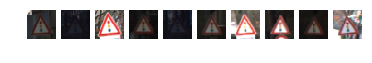

27  -  Pedestrians


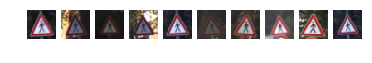

28  -  Children crossing


29  -  Bicycles crossing


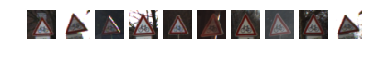

30  -  Beware of ice/snow


31  -  Wild animals crossing


32  -  End of all speed and passing limits


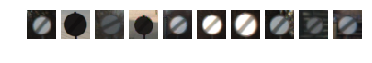

33  -  Turn right ahead


34  -  Turn left ahead


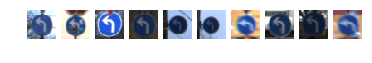

35  -  Ahead only


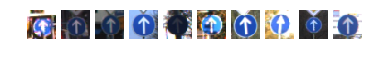

36  -  Go straight or right


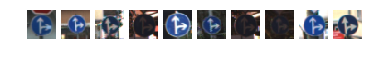

37  -  Go straight or left


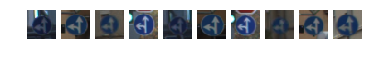

38  -  Keep right


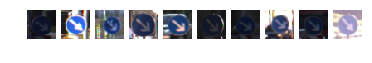

39  -  Keep left


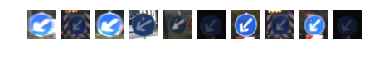

40  -  Roundabout mandatory


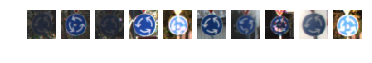

41  -  End of no passing


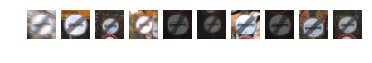

42  -  End of no passing by vehicles over 3.5 metric tons


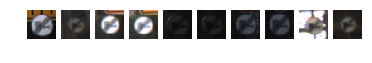

In [4]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random
import csv

# Visualizations will be shown in the notebook.
%matplotlib inline

# Signs store the names of traffic sign class i at index i
signs = []
with open('signnames.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        signs.append(row[1])
signs = signs[1:]

# labels is a dict from class to all the training examples of class i
labels = {}
for i in range(len(y_train)):
    if y_train[i] in labels:
        labels[y_train[i]].append(X_train[i])
    else:
        labels[y_train[i]] = [X_train[i]]

# Plot frequency vs class bar chart
freq = [len(labels[i]) for i in range(n_classes)]
plt.bar(range(n_classes), freq)
plt.title('Frequency vs Class')
plt.show()

# see images of 10 random examples from each class
for label in labels.items():
    print(label[0], ' - ', signs[label[0]])
    figures = []
    for image in random.sample(label[1], 10):
        figures.append(image.squeeze())
    plot_figures(figures, 1, 10)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
import skimage
from skimage import exposure

def prepocess_data(data):
    """
        data must be of type [?, X, Y, 3] - array of 3 channel images
    """
    ret = np.zeros([data.shape[0], data.shape[1], data.shape[2], 1])
    
    # Run an equalize_adaphist on the original 3 channel image and then convert into grayscale
    for i in range(data.shape[0]):
        ret[i] = skimage.color.rgb2gray(exposure.equalize_adapthist(data[i])).reshape([data.shape[1], data.shape[2], 1])
    
    return ret

In [6]:
X_train = prepocess_data(X_train)
X_valid = prepocess_data(X_valid)

C:\Users\prudha\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


Using TensorFlow backend.


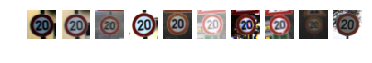

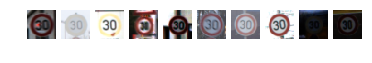

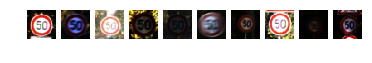

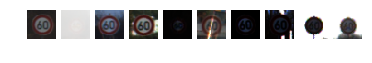

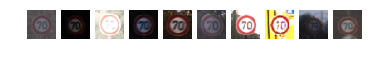

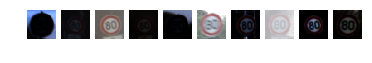

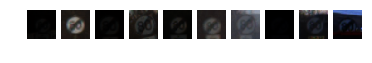

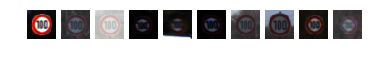

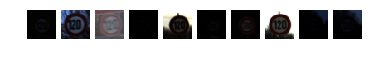

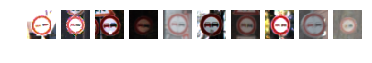

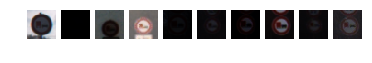

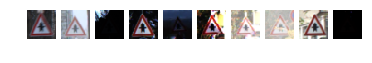

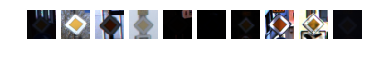

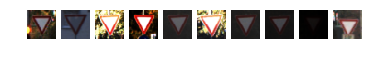

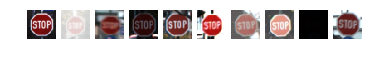

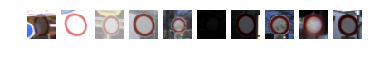

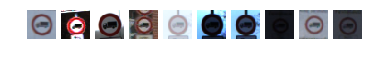

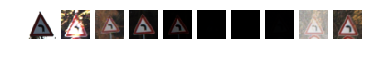

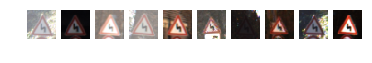

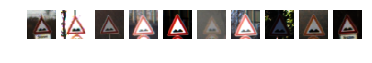

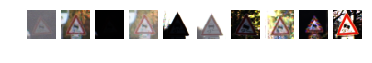

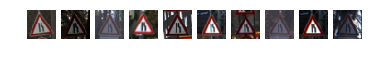

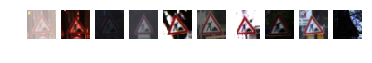

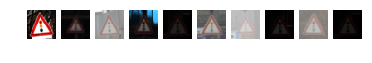

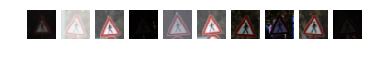

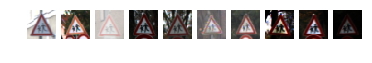

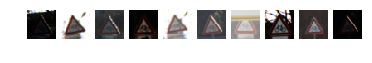

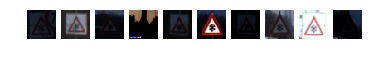

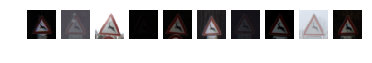

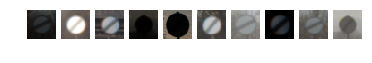

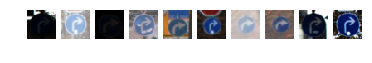

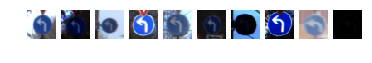

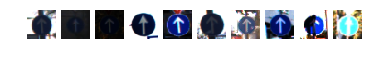

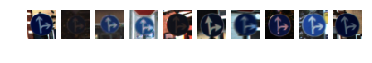

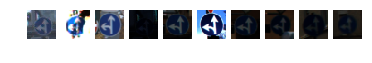

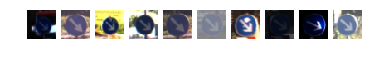

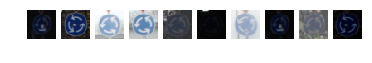

1 1980
2 2010
3 1260
4 1770
5 1650


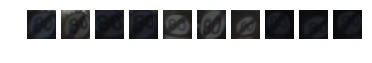

7 1290
8 1260
9 1320
10 1800
11 1170
12 1890
13 1920


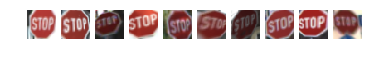

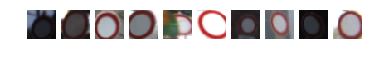

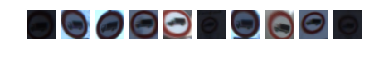

18 1080


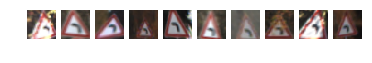

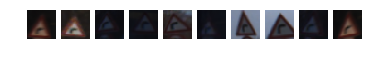

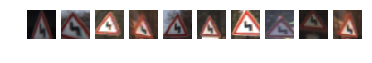

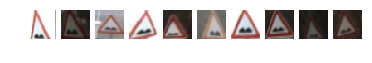

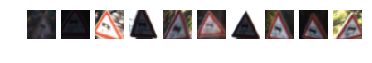

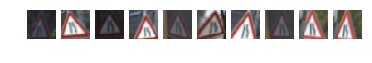

25 1350


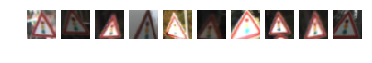

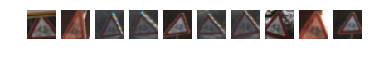

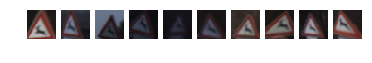

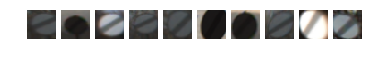

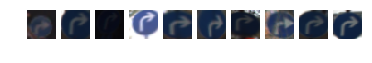

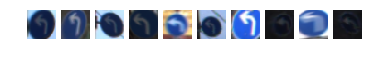

35 1080


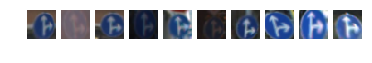

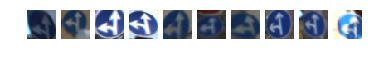

38 1860


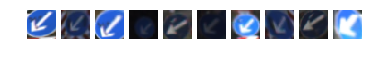

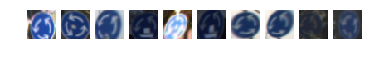

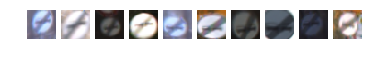

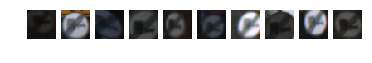

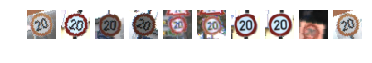

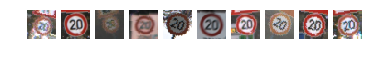

0 (180, 32, 32, 3)
Generated images for class  1  previously has 1980
Generated images for class  2  previously has 2010
Generated images for class  3  previously has 1260
Generated images for class  4  previously has 1770
Generated images for class  5  previously has 1650


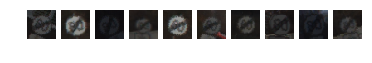

6 (360, 32, 32, 3)
Generated images for class  7  previously has 1290
Generated images for class  8  previously has 1260
Generated images for class  9  previously has 1320
Generated images for class  10  previously has 1800
Generated images for class  11  previously has 1170
Generated images for class  12  previously has 1890
Generated images for class  13  previously has 1920
Generated images for class  14  previously has 690
Generated images for class  15  previously has 540


16 (360, 32, 32, 3)
Generated images for class  17  previously has 990
Generated images for class  18  previously has 1080


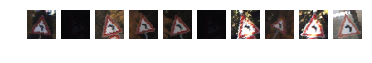

19 (180, 32, 32, 3)


20 (300, 32, 32, 3)


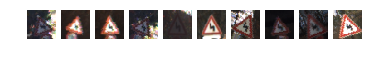

21 (270, 32, 32, 3)


22 (330, 32, 32, 3)
23 (450, 32, 32, 3)


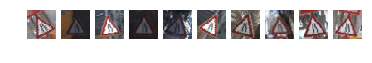

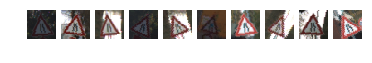

24 (240, 32, 32, 3)
Generated images for class  25  previously has 1350
Generated images for class  26  previously has 540


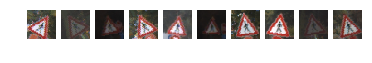

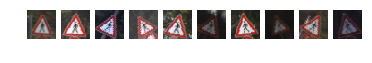

27 (210, 32, 32, 3)
28 (480, 32, 32, 3)


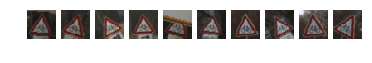

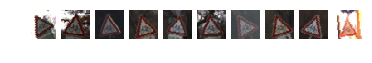

29 (240, 32, 32, 3)
30 (390, 32, 32, 3)
Generated images for class  31  previously has 690


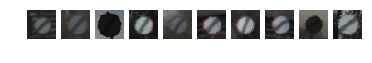

32 (210, 32, 32, 3)
Generated images for class  33  previously has 599


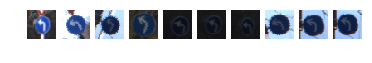

34 (360, 32, 32, 3)
Generated images for class  35  previously has 1080


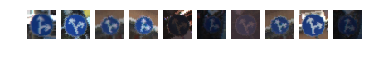

36 (330, 32, 32, 3)


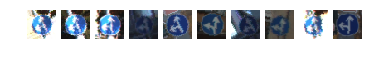

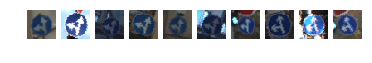

37 (180, 32, 32, 3)
Generated images for class  38  previously has 1860


39 (270, 32, 32, 3)


40 (300, 32, 32, 3)


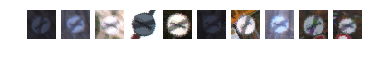

41 (210, 32, 32, 3)


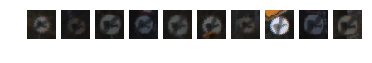

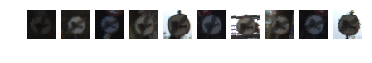

42 (210, 32, 32, 3)


1 1980
2 2010
3 1260
4 1770
5 1650


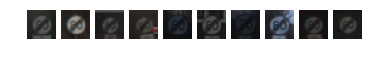

7 1290
8 1260
9 1320
10 1800
11 1170
12 1890
13 1920


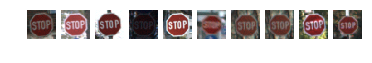

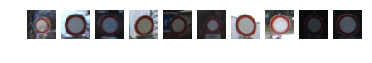

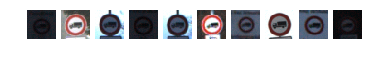

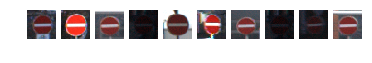

18 1080


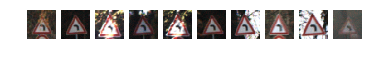

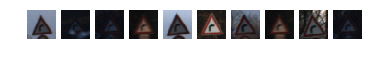

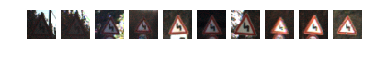

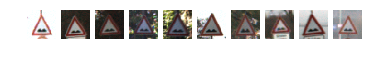

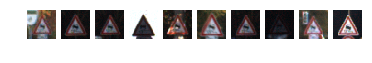

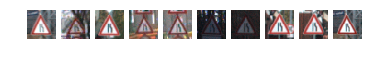

25 1350


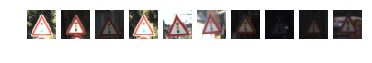

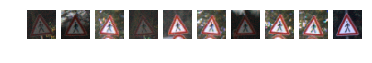

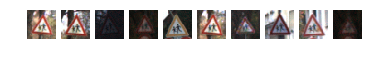

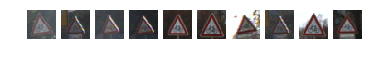

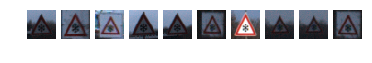

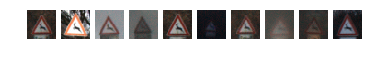

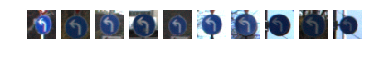

35 1080


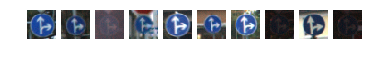

38 1860


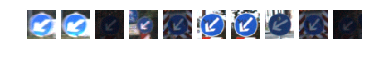

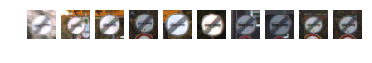

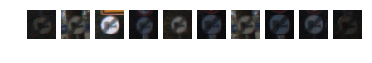

C:\Users\prudha\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [7]:
## Generate more dataset using keras and opencv
from keras.preprocessing.image import ImageDataGenerator
import cv2

# generate images using datagenerator object. The resultant class will have atleast threshold number of images
def generate_data(datagen, threshold):
    new_data, y = None, None
    for i in range(n_classes):
        labels[i] = np.array(labels[i])
        if(labels[i].shape[0] < threshold):
            j = 0
            for batch in datagen.flow(np.array(labels[i]), batch_size=128):
                j += batch.shape[0]
                if j > (threshold -  labels[i].shape[0]):
                    print(i, labels[i].shape)
                    break
                if new_data is not None:
                    new_data = np.concatenate([new_data, batch])
                else:
                    new_data = batch
                if y is not None:
                    y = np.concatenate([y, batch.shape[0]*[i]])
                else:
                    y = batch.shape[0]*[i]

                plot_figures(batch[0:10], 1, 10)
                plt.show()
        else:
            print("Generated images for class ",i, " previously has" ,labels[i].shape[0])
    
    return (new_data, y)

# Returns an image with random gamma variation
def adjust_gamma(img):
    gamma = random.random() * 2.5 + 0.1
    img = cv2.pow(img, gamma)
    return img

# Returns an image with random perspective transformation
def perspTransform(img):
    width = img.shape[0]/4
    pts1 = np.float32([[random.randint(0,width),random.randint(0,width)],
                                   [random.randint(3*width,4*width),random.randint(0,width)],
                                   [random.randint(0,width),random.randint(3*width,4*width)],
                                   [random.randint(3*width,4*width),random.randint(3*width,4*width)]])
    pts2 = np.float32([[0,0],[4*width,0],[0,4*width],[4*width,4*width]])
    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img, M, (32,32))
    return dst

# Returns an image after adding guassian noise
def gaussian_noise(img):
    dst = np.zeros(img.shape)
    std = 0.025
    cv2.randn(dst, 0., std)
    x = img + dst
    x[x > 1.0] = 1.0
    x[x < 0.0] = 0.0
    return x

# generic fn generating images till threshold using the func 
def generate_data2(func, th):
    new_data, y = None, None
    batch_size = 500
    for i in range(n_classes):
        labels[i] = np.array(labels[i])
        if(labels[i].shape[0] < th):
            j = 0
            batch = np.zeros([batch_size, 32,32,3])
            for j in range(batch_size):
                batch[j] = func(labels[i][random.randint(0, labels[i].shape[0] - 1)])
                
            j += batch.shape[0]
            if new_data is not None:
                new_data = np.concatenate([new_data, batch])
            else:
                new_data = batch
            if y is not None:
                y = np.concatenate([y, batch.shape[0]*[i]])
            else:
                y = batch.shape[0]*[i]

            plot_figures(batch[0:10], 1, 10)
            plt.show()
        else:
            print(i, labels[i].shape[0])
    
    return (new_data, y)

from functools import partial

new_data = generate_data2(adjust_gamma, 3000)
new_data2 = generate_data2(perspTransform, 1000)
new_data3 = generate_data(ImageDataGenerator(rotation_range = 30), 500)
new_data4 = generate_data2(gaussian_noise, 1000)

X_train = np.concatenate([prepocess_data(new_data[0]), X_train])
y_train = np.concatenate([new_data[1], y_train])

X_train = np.concatenate([prepocess_data(new_data2[0]), X_train])
y_train = np.concatenate([new_data2[1], y_train])

X_train = np.concatenate([prepocess_data(new_data3[0]), X_train])
y_train = np.concatenate([new_data3[1], y_train])

X_train = np.concatenate([prepocess_data(new_data4[0]), X_train])
y_train = np.concatenate([new_data4[1], y_train])


In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
print("Training set after all the data augmentation", X_train.shape)

Training set after all the data augmentation (86695, 32, 32, 1)


### Model Architecture

In [9]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [10]:
from tensorflow.contrib.layers import flatten
l1 = None
l2 = None
l3 = None
l4 = None
def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    global l1,l2,l3,l4
    
#     normalize the data between -1 to 1
    x = tf.divide(tf.subtract(x, tf.constant(0.5)),tf.constant(0.5))
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x20.
    weights = tf.Variable(tf.truncated_normal([5,5,1,20], mu, sigma))
    bias = tf.truncated_normal([20], mu, sigma)
    l1 = conv2d(x, weights, bias)
    
    # Pooling. Input = 28x28x20. Output = 14x14x20.
    pool = tf.nn.max_pool(
        l1,
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x40.
    weights = tf.Variable(tf.truncated_normal([5,5,20,40], mu, sigma))
    bias = tf.truncated_normal([40], mu, sigma)
    l2 = conv2d(pool, weights, bias)
    
    # Pooling. Input = 10x10x40. Output = 5x5x40.
    pool = tf.nn.max_pool(
        l2,
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        padding='VALID')
    
    # Add a dropout to avoid over-fitting
    l2 = tf.nn.dropout(l2, keep_prob)
    
    # Flatten. Input = 5x5x40. Output = 1000.
    flatt = flatten(pool)
    
    # Layer 3: Fully Connected. Input = 1000. Output = 250.
    weights = tf.Variable(tf.truncated_normal( [1000,250], mu, sigma))
    bias = tf.truncated_normal([250], mu, sigma)
    l3 = tf.add(tf.matmul(flatt, weights), bias)
    
    # Add a dropout to avoid over-fitting
    l3 = tf.nn.dropout(l3, keep_prob)
    
    # Layer 4: Fully Connected. Input = 250. Output = 125.
    weights = tf.Variable(tf.truncated_normal([250,125], mu, sigma))
    bias = tf.truncated_normal([125], mu, sigma)
    l4 = tf.add(tf.matmul(l3, weights), bias)
    
    # Add a dropout to avoid over-fitting
    l4 = tf.nn.dropout(l4, keep_prob)
    
    # Layer 5: Fully Connected. Input = 125. Output = 84
    weights = tf.Variable(tf.truncated_normal([125,84], mu, sigma))
    bias = tf.truncated_normal([84], mu, sigma)
    l5 = tf.add(tf.matmul(l4, weights), bias)
    
    l5 = tf.nn.dropout(l5, keep_prob)
    
    # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
    weights = tf.Variable(tf.truncated_normal([84, 43], mu, sigma))
    bias = tf.truncated_normal([43], mu, sigma)
    logits = tf.add(tf.matmul(l5, weights), bias)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
x = tf.placeholder(tf.float32, (None, X_train.shape[1], X_train.shape[2], X_train.shape[3]))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [12]:
rate = tf.placeholder_with_default(0.001, None)

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
with tf.Session() as sess:
    num_examples = len(X_train)
    print("Training...", X_train.shape)
    print()
    for train_iter in range(2):
        print("Training iteration: ", train_iter)
        if train_iter == 0:
            sess.run(tf.global_variables_initializer())
        else:
             saver.restore(sess, './lenet')
                
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6, 
                                                        rate:0.001 if train_iter == 0 else 0.0001})

            validation_accuracy = evaluate(X_valid, y_valid)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training... (86695, 32, 32, 1)

Training iteration:  0
EPOCH 1 ...
Validation Accuracy = 0.908

EPOCH 2 ...
Validation Accuracy = 0.930

EPOCH 3 ...
Validation Accuracy = 0.935

EPOCH 4 ...
Validation Accuracy = 0.940

EPOCH 5 ...
Validation Accuracy = 0.943

EPOCH 6 ...
Validation Accuracy = 0.946

EPOCH 7 ...
Validation Accuracy = 0.944

EPOCH 8 ...
Validation Accuracy = 0.950

EPOCH 9 ...
Validation Accuracy = 0.950

EPOCH 10 ...
Validation Accuracy = 0.950

Training iteration:  1
EPOCH 1 ...
Validation Accuracy = 0.963

EPOCH 2 ...
Validation Accuracy = 0.963

EPOCH 3 ...
Validation Accuracy = 0.962

EPOCH 4 ...
Validation Accuracy = 0.962

EPOCH 5 ...
Validation Accuracy = 0.964

EPOCH 6 ...
Validation Accuracy = 0.963

EPOCH 7 ...
Validation Accuracy = 0.963

EPOCH 8 ...
Validation Accuracy = 0.964

EPOCH 9 ...
Validation Accuracy = 0.963

EPOCH 10 ...
Validation Accuracy = 0.965

Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [39]:
### Load the images downloaded from web.
from os import listdir
import matplotlib.image as mpimg
import scipy, csv
imgs = []
for file in listdir('pics'):
    image = mpimg.imread('pics/' + file)
    image = scipy.misc.imresize(image, (32,32,3))
    image = image / 255.0
    imgs.append(image)

### Predict the Sign Type for Each Image

C:\Users\prudha\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


Actual class :  Speed limit (30km/h)
TopKV2(values=array([  9.99445736e-01,   5.09566336e-04,   4.46877457e-05,
         2.98341760e-08,   1.66722760e-08], dtype=float32), indices=array([1, 5, 2, 4, 6])) 

Top five predictions:Speed limit (30km/h), Speed limit (80km/h), Speed limit (50km/h), Speed limit (70km/h), End of speed limit (80km/h), 

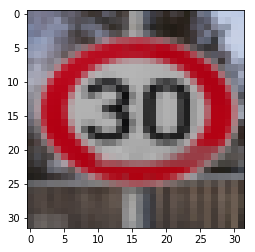

Actual class :  Children crossing
TopKV2(values=array([  9.92783666e-01,   4.54615289e-03,   1.00868358e-03,
         4.59425035e-04,   4.28564206e-04], dtype=float32), indices=array([28, 29, 18, 25, 27])) 

Top five predictions:Children crossing, Bicycles crossing, General caution, Road work, Pedestrians, 

Actual class :  Road narrows on the right
TopKV2(values=array([  6.90072954e-01,   3.00187290e-01,   6.36261748e-03,
         2.12142151e-03,   5.88593772e-04], dtype=float32), indices=array([24, 29, 28, 27, 26])) 

Top five predictions:Road narrows on the right, Bicycles crossing, Children crossing, Pedestrians, Traffic signals, 

Actual class :  No entry
TopKV2(values=array([  6.48086548e-01,   2.28345320e-01,   8.79358649e-02,
         3.45741585e-02,   2.94793572e-04], dtype=float32), indices=array([17, 41, 42, 23, 10])) 

Top five predictions:No entry, End of no passing, End of no passing by vehicles over 3.5 metric tons, Slippery road, No passing for vehicles over 3.5 metric tons, 

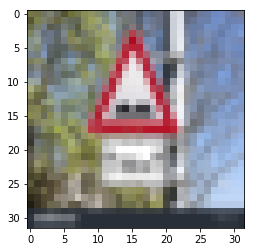

Actual class :  End of no passing by vehicles over 3.5 metric tons
TopKV2(values=array([ 0.50499505,  0.22452497,  0.17433149,  0.02162033,  0.01671649], dtype=float32), indices=array([42,  6, 40, 17, 18])) 

Top five predictions:End of no passing by vehicles over 3.5 metric tons, End of speed limit (80km/h), Roundabout mandatory, No entry, General caution, 

Actual class :  Stop
TopKV2(values=array([  9.99998569e-01,   6.63181709e-07,   4.10532749e-07,
         2.29453661e-07,   4.35805170e-08], dtype=float32), indices=array([14, 17, 39, 36, 13])) 

Top five predictions:Stop, No entry, Keep left, Go straight or right, Yield, 

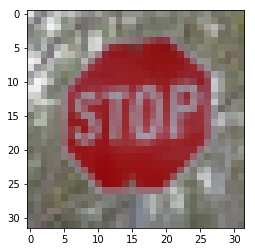

Actual class :  Right-of-way at the next intersection
TopKV2(values=array([  9.99999881e-01,   1.01967274e-07,   3.16963655e-09,
         5.52322250e-11,   2.56293858e-11], dtype=float32), indices=array([11, 27, 30, 28, 21])) 

Top five predictions:Right-of-way at the next intersection, Pedestrians, Beware of ice/snow, Children crossing, Double curve, 

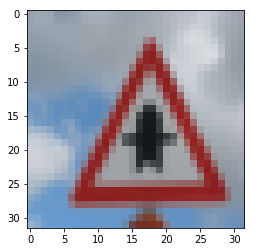

Actual class :  Wild animals crossing
TopKV2(values=array([  9.99972105e-01,   1.66220398e-05,   1.12124653e-05,
         4.01164222e-08,   1.56872015e-09], dtype=float32), indices=array([31, 21, 20, 23, 27])) 

Top five predictions:Wild animals crossing, Double curve, Dangerous curve to the right, Slippery road, Pedestrians, 

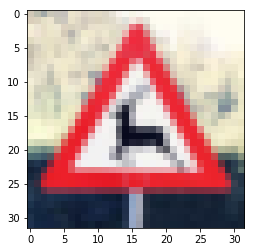

Actual class :  Bicycles crossing
TopKV2(values=array([ 0.50940269,  0.32010737,  0.05352008,  0.03556947,  0.01809477], dtype=float32), indices=array([29, 30, 26, 19, 31])) 

Top five predictions:Bicycles crossing, Beware of ice/snow, Traffic signals, Dangerous curve to the left, Wild animals crossing, 

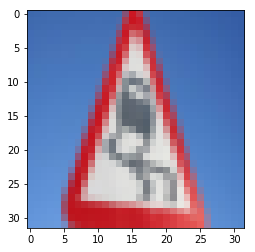

Actual class :  No entry
TopKV2(values=array([  1.00000000e+00,   1.26029892e-17,   6.35560088e-19,
         1.32319107e-19,   5.78302000e-20], dtype=float32), indices=array([17, 33, 36, 37, 14])) 

Top five predictions:No entry, Turn right ahead, Go straight or right, Go straight or left, Stop, 

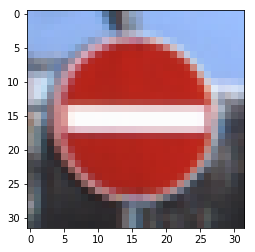

Actual class :  Bicycles crossing
TopKV2(values=array([ 0.6621874 ,  0.29320621,  0.01938515,  0.00994241,  0.00480761], dtype=float32), indices=array([29,  0, 28,  6, 30])) 

Top five predictions:Bicycles crossing, Speed limit (20km/h), Children crossing, End of speed limit (80km/h), Beware of ice/snow, 

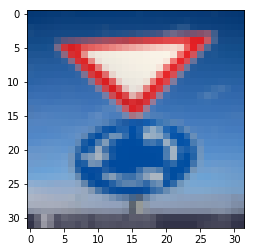

In [41]:
### Running the predictions here and use the model to output the prediction for each image.
import operator
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    res = sess.run(logits, feed_dict = {x: prepocess_data(np.array(imgs)), keep_prob: 1.0})
    arr = tf.placeholder(tf.float32, (None))
    topk = tf.nn.top_k(tf.nn.softmax(arr), k = 5)
    
    for i in range(len(res)):
        max_index, max_value = max(enumerate(res[i]), key=operator.itemgetter(1))
        print("Actual class : " ,signs[max_index])
        topkvalues = sess.run(topk, feed_dict={arr: res[i]})
        print(topkvalues, "\n\nTop five predictions:", end="")
        for index in topkvalues.indices:
            print(signs[index], end=', ')
        plt.imshow(imgs[i])
        plt.show()

### Analyze Performance And Emit Softmax Probabilites For all the web images

 ** The accuracy for these five images is 100% and the large difference in softmax probabilites show the certainity of the model in predicting the required output ** 
 
 For the test images, let us see what will be the result

In [17]:
data = prepocess_data(X_test)

C:\Users\prudha\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


Test Accuracy = 0.982
Train Accuracy = 0.995
4410
original -  End of no passing TopKV2(values=array([  9.71740246e-01,   2.73572095e-02,   8.60838918e-04,
         2.24781688e-05,   1.68542301e-05], dtype=float32), indices=array([32, 41, 42,  6, 16]))
End of all speed and passing limits, End of no passing, End of no passing by vehicles over 3.5 metric tons, End of speed limit (80km/h), Vehicles over 3.5 metric tons prohibited, 

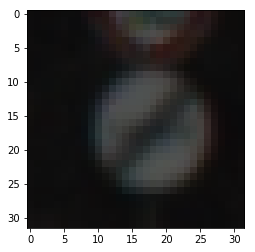

original -  End of no passing TopKV2(values=array([  9.99907017e-01,   7.32612898e-05,   1.63038785e-05,
         2.21682308e-06,   5.82805171e-07], dtype=float32), indices=array([32, 41,  6, 28, 42]))
End of all speed and passing limits, End of no passing, End of speed limit (80km/h), Children crossing, End of no passing by vehicles over 3.5 metric tons, 

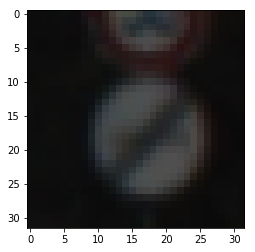

original -  End of no passing TopKV2(values=array([  9.98823583e-01,   1.13721262e-03,   3.67096363e-05,
         2.12990290e-06,   2.90324010e-07], dtype=float32), indices=array([32, 41, 42,  6, 16]))
End of all speed and passing limits, End of no passing, End of no passing by vehicles over 3.5 metric tons, End of speed limit (80km/h), Vehicles over 3.5 metric tons prohibited, 

original -  Speed limit (30km/h) TopKV2(values=array([  6.02840245e-01,   3.03157181e-01,   9.30821449e-02,
         8.05849268e-04,   6.91944442e-05], dtype=float32), indices=array([ 4, 15,  1,  2,  5]))
Speed limit (70km/h), No vehicles, Speed limit (30km/h), Speed limit (50km/h), Speed limit (80km/h), 

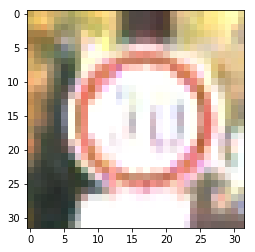

original -  Speed limit (30km/h) TopKV2(values=array([ 0.42472339,  0.29348522,  0.15394467,  0.12087773,  0.00595919], dtype=float32), indices=array([15,  0,  1,  4,  2]))
No vehicles, Speed limit (20km/h), Speed limit (30km/h), Speed limit (70km/h), Speed limit (50km/h), 

original -  Speed limit (30km/h) TopKV2(values=array([ 0.64391339,  0.33739084,  0.00805266,  0.00647749,  0.00247476], dtype=float32), indices=array([ 5, 15,  1,  3,  4]))
Speed limit (80km/h), No vehicles, Speed limit (30km/h), Speed limit (60km/h), Speed limit (70km/h), 

original -  Speed limit (30km/h) TopKV2(values=array([  5.02053022e-01,   4.76055562e-01,   2.18714010e-02,
         1.08888580e-05,   4.95726363e-06], dtype=float32), indices=array([5, 1, 4, 7, 2]))
Speed limit (80km/h), Speed limit (30km/h), Speed limit (70km/h), Speed limit (100km/h), Speed limit (50km/h), 

original -  Roundabout mandatory TopKV2(values=array([  9.87239182e-01,   1.00648794e-02,   2.14405265e-03,
         2.20740738e-04,   1.47994229e-04], dtype=float32), indices=array([37, 40, 35, 34,  9]))
Go straight or left, Roundabout mandatory, Ahead only, Turn left ahead, No passing, 

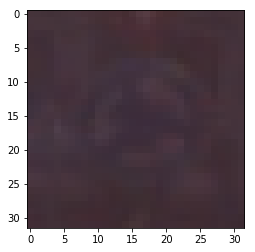

original -  Roundabout mandatory TopKV2(values=array([ 0.73507679,  0.19830963,  0.05048138,  0.01330516,  0.00101174], dtype=float32), indices=array([12, 40, 15, 35, 37]))
Priority road, Roundabout mandatory, No vehicles, Ahead only, Go straight or left, 

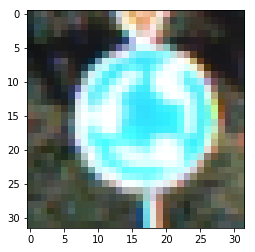

original -  Roundabout mandatory TopKV2(values=array([ 0.46590352,  0.4606047 ,  0.03225404,  0.03032305,  0.00437981], dtype=float32), indices=array([40, 15, 12, 35, 38]))
Roundabout mandatory, No vehicles, Priority road, Ahead only, Keep right, 

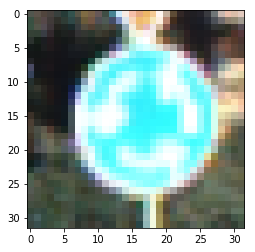

original -  Roundabout mandatory TopKV2(values=array([ 0.58953291,  0.26469642,  0.11650692,  0.02107139,  0.00595214], dtype=float32), indices=array([40, 15, 38, 35, 34]))
Roundabout mandatory, No vehicles, Keep right, Ahead only, Turn left ahead, 

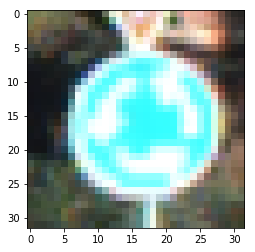

original -  Roundabout mandatory TopKV2(values=array([ 0.7978375 ,  0.11365167,  0.06954997,  0.01559026,  0.00224005], dtype=float32), indices=array([38, 40, 15, 35, 12]))
Keep right, Roundabout mandatory, No vehicles, Ahead only, Priority road, 

original -  Roundabout mandatory TopKV2(values=array([ 0.51079786,  0.38120964,  0.06094929,  0.03751294,  0.00507094], dtype=float32), indices=array([40, 38, 15, 35, 12]))
Roundabout mandatory, Keep right, No vehicles, Ahead only, Priority road, 

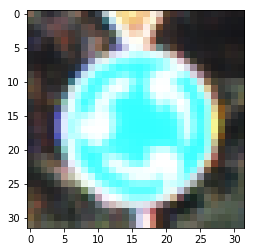

original -  Roundabout mandatory TopKV2(values=array([  4.26202774e-01,   3.89208019e-01,   1.82300910e-01,
         1.82552822e-03,   3.76923883e-04], dtype=float32), indices=array([15, 38, 40, 12, 35]))
No vehicles, Keep right, Roundabout mandatory, Priority road, Ahead only, 

original -  Roundabout mandatory TopKV2(values=array([  9.67138708e-01,   2.94860657e-02,   1.84996473e-03,
         1.27536047e-03,   2.10249025e-04], dtype=float32), indices=array([40, 15, 38, 12, 35]))
Roundabout mandatory, No vehicles, Keep right, Priority road, Ahead only, 

original -  Speed limit (60km/h) TopKV2(values=array([  9.64005053e-01,   3.57869789e-02,   2.03208430e-04,
         2.63170932e-06,   1.39869030e-06], dtype=float32), indices=array([ 5,  3,  2,  8, 14]))
Speed limit (80km/h), Speed limit (60km/h), Speed limit (50km/h), Speed limit (120km/h), Stop, 

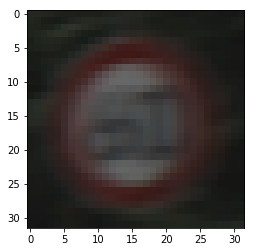

original -  Speed limit (60km/h) TopKV2(values=array([  5.35531878e-01,   4.32117313e-01,   2.69199517e-02,
         5.22495573e-03,   9.07028589e-05], dtype=float32), indices=array([ 5,  3,  2, 14,  9]))
Speed limit (80km/h), Speed limit (60km/h), Speed limit (50km/h), Stop, No passing, 

original -  Right-of-way at the next intersection TopKV2(values=array([  5.00761390e-01,   4.52062070e-01,   4.51346785e-02,
         1.52451755e-03,   2.64775706e-04], dtype=float32), indices=array([11, 21, 27, 30, 26]))
Right-of-way at the next intersection, Double curve, Pedestrians, Beware of ice/snow, Traffic signals, 

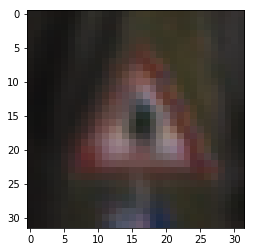

original -  Pedestrians TopKV2(values=array([ 0.70441806,  0.167923  ,  0.05471574,  0.03467479,  0.02355985], dtype=float32), indices=array([27, 11, 18, 29, 24]))
Pedestrians, Right-of-way at the next intersection, General caution, Bicycles crossing, Road narrows on the right, 

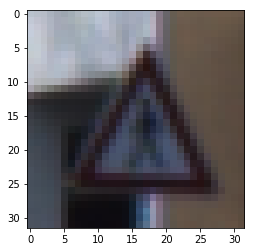

original -  Pedestrians TopKV2(values=array([  7.29599953e-01,   2.12337837e-01,   5.57076894e-02,
         1.48372888e-03,   4.09224507e-04], dtype=float32), indices=array([11, 27, 28, 18, 24]))
Right-of-way at the next intersection, Pedestrians, Children crossing, General caution, Road narrows on the right, 

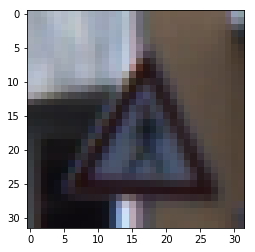

original -  Pedestrians TopKV2(values=array([ 0.79576796,  0.14561197,  0.02915941,  0.01171162,  0.01065669], dtype=float32), indices=array([29, 27, 28, 24, 11]))
Bicycles crossing, Pedestrians, Children crossing, Road narrows on the right, Right-of-way at the next intersection, 

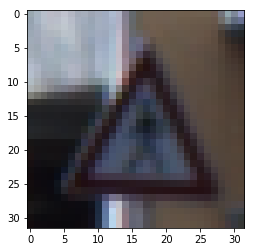

original -  Pedestrians TopKV2(values=array([  8.81286383e-01,   1.18558101e-01,   1.17033058e-04,
         2.37388685e-05,   5.18187471e-06], dtype=float32), indices=array([11, 27, 28, 25, 29]))
Right-of-way at the next intersection, Pedestrians, Children crossing, Road work, Bicycles crossing, 

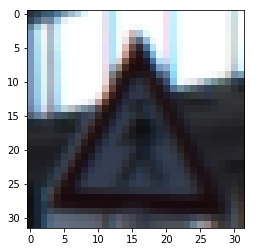

original -  Pedestrians TopKV2(values=array([ 0.70692873,  0.11713937,  0.09810892,  0.07436343,  0.00205567], dtype=float32), indices=array([23, 11, 25, 29, 22]))
Slippery road, Right-of-way at the next intersection, Road work, Bicycles crossing, Bumpy road, 

original -  Road narrows on the right TopKV2(values=array([ 0.69723684,  0.13309498,  0.08342107,  0.035176  ,  0.02003045], dtype=float32), indices=array([20, 28, 25, 26, 27]))
Dangerous curve to the right, Children crossing, Road work, Traffic signals, Pedestrians, 

original -  Road narrows on the right TopKV2(values=array([  5.10303736e-01,   4.87958848e-01,   9.12030984e-04,
         4.91574639e-04,   1.33351859e-04], dtype=float32), indices=array([24, 20, 28, 30, 23]))
Road narrows on the right, Dangerous curve to the right, Children crossing, Beware of ice/snow, Slippery road, 

original -  No passing TopKV2(values=array([ 0.60106605,  0.39341471,  0.00198093,  0.00084881,  0.00069403], dtype=float32), indices=array([10,  9, 40, 37, 17]))
No passing for vehicles over 3.5 metric tons, No passing, Roundabout mandatory, Go straight or left, No entry, 

original -  No passing TopKV2(values=array([  7.15574324e-01,   2.84327596e-01,   8.73378449e-05,
         7.91368166e-06,   1.28540012e-06], dtype=float32), indices=array([15,  9, 16,  3, 35]))
No vehicles, No passing, Vehicles over 3.5 metric tons prohibited, Speed limit (60km/h), Ahead only, 

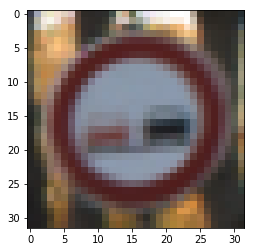

original -  No passing TopKV2(values=array([  5.03608227e-01,   4.96315211e-01,   6.60128280e-05,
         9.44540443e-06,   7.80227481e-07], dtype=float32), indices=array([ 9, 15, 16,  3,  8]))
No passing, No vehicles, Vehicles over 3.5 metric tons prohibited, Speed limit (60km/h), Speed limit (120km/h), 

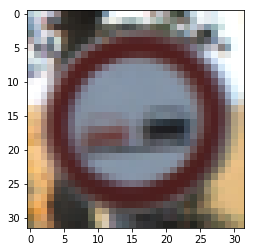

original -  No passing TopKV2(values=array([  9.57889795e-01,   4.02054302e-02,   1.90403673e-03,
         4.08567047e-07,   1.34227221e-07], dtype=float32), indices=array([15,  9, 16, 38,  8]))
No vehicles, No passing, Vehicles over 3.5 metric tons prohibited, Keep right, Speed limit (120km/h), 

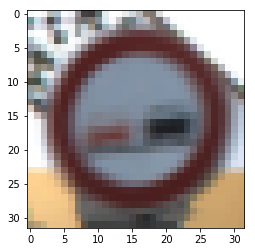

original -  Speed limit (80km/h) TopKV2(values=array([ 0.66534364,  0.22891515,  0.03768991,  0.01636181,  0.01528497], dtype=float32), indices=array([33,  5,  4, 42,  3]))
Turn right ahead, Speed limit (80km/h), Speed limit (70km/h), End of no passing by vehicles over 3.5 metric tons, Speed limit (60km/h), 

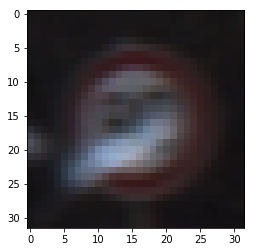

original -  Keep right TopKV2(values=array([  9.69291449e-01,   2.61019487e-02,   3.75824142e-03,
         6.05871261e-04,   1.40196964e-04], dtype=float32), indices=array([34, 38, 21, 14, 40]))
Turn left ahead, Keep right, Double curve, Stop, Roundabout mandatory, 

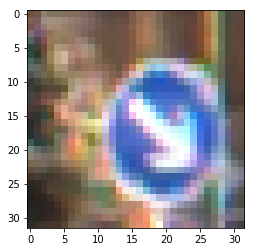

original -  Speed limit (120km/h) TopKV2(values=array([  5.10671198e-01,   4.76375729e-01,   1.28816376e-02,
         5.67743919e-05,   8.73813588e-06], dtype=float32), indices=array([ 8,  7,  5,  2, 10]))
Speed limit (120km/h), Speed limit (100km/h), Speed limit (80km/h), Speed limit (50km/h), No passing for vehicles over 3.5 metric tons, 

original -  Speed limit (120km/h) TopKV2(values=array([  5.93171000e-01,   4.05084997e-01,   1.17742969e-03,
         5.23429306e-04,   1.41015462e-05], dtype=float32), indices=array([ 8,  7, 15,  5,  4]))
Speed limit (120km/h), Speed limit (100km/h), No vehicles, Speed limit (80km/h), Speed limit (70km/h), 

original -  Speed limit (120km/h) TopKV2(values=array([ 0.66590565,  0.258618  ,  0.03626322,  0.02068741,  0.00804432], dtype=float32), indices=array([16, 40,  8, 15, 32]))
Vehicles over 3.5 metric tons prohibited, Roundabout mandatory, Speed limit (120km/h), No vehicles, End of all speed and passing limits, 

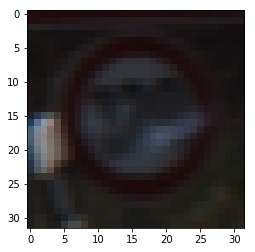

original -  Turn left ahead TopKV2(values=array([ 0.50816369,  0.47564876,  0.00942253,  0.00370056,  0.00246196], dtype=float32), indices=array([34, 15, 40, 35, 38]))
Turn left ahead, No vehicles, Roundabout mandatory, Ahead only, Keep right, 

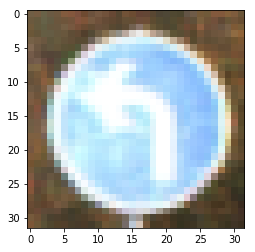

original -  General caution TopKV2(values=array([  7.23403215e-01,   2.75517970e-01,   4.33224312e-04,
         1.90052990e-04,   9.69914690e-05], dtype=float32), indices=array([26, 18, 19, 38, 34]))
Traffic signals, General caution, Dangerous curve to the left, Keep right, Turn left ahead, 

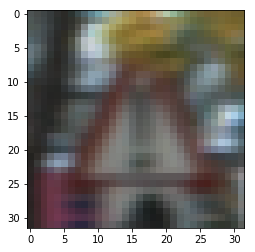

original -  General caution TopKV2(values=array([ 0.41353422,  0.3939113 ,  0.14711139,  0.02298776,  0.0076705 ], dtype=float32), indices=array([26, 38, 18, 11, 30]))
Traffic signals, Keep right, General caution, Right-of-way at the next intersection, Beware of ice/snow, 

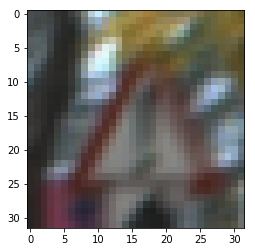

original -  General caution TopKV2(values=array([ 0.87316102,  0.07459996,  0.02073786,  0.01242461,  0.0066026 ], dtype=float32), indices=array([38, 18, 30, 26, 34]))
Keep right, General caution, Beware of ice/snow, Traffic signals, Turn left ahead, 

original -  General caution TopKV2(values=array([ 0.66216481,  0.32684234,  0.00537443,  0.00344225,  0.00103405], dtype=float32), indices=array([24, 18, 27, 26, 28]))
Road narrows on the right, General caution, Pedestrians, Traffic signals, Children crossing, 

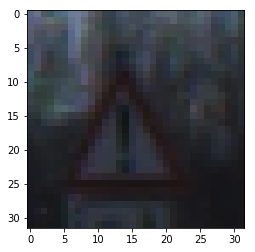

original -  General caution TopKV2(values=array([ 0.95390934,  0.0194222 ,  0.01676363,  0.0073877 ,  0.00120563], dtype=float32), indices=array([27, 26, 24, 21, 20]))
Pedestrians, Traffic signals, Road narrows on the right, Double curve, Dangerous curve to the right, 

original -  General caution TopKV2(values=array([ 0.94793421,  0.02834925,  0.01729262,  0.0040519 ,  0.00107845], dtype=float32), indices=array([24, 28, 18, 26, 29]))
Road narrows on the right, Children crossing, General caution, Traffic signals, Bicycles crossing, 

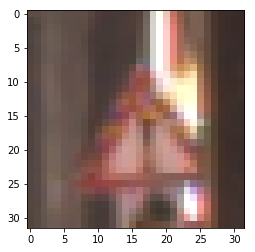

original -  Yield TopKV2(values=array([ 0.38630193,  0.15661709,  0.14992422,  0.1310515 ,  0.05422894], dtype=float32), indices=array([19, 34, 21, 23, 13]))
Dangerous curve to the left, Turn left ahead, Double curve, Slippery road, Yield, 

original -  Yield TopKV2(values=array([  9.47789609e-01,   4.58497927e-02,   5.12061175e-03,
         8.29167431e-04,   2.35442145e-04], dtype=float32), indices=array([33, 36, 35, 37, 34]))
Turn right ahead, Go straight or right, Ahead only, Go straight or left, Turn left ahead, 

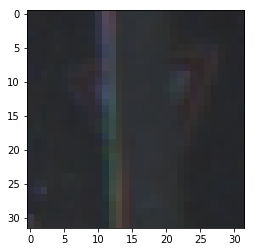

original -  Yield TopKV2(values=array([ 0.85456836,  0.06603596,  0.02343916,  0.02211648,  0.01525589], dtype=float32), indices=array([37, 13, 14, 34, 36]))
Go straight or left, Yield, Stop, Turn left ahead, Go straight or right, 

original -  Speed limit (100km/h) TopKV2(values=array([  5.19150317e-01,   4.76500005e-01,   2.83829984e-03,
         1.08092686e-03,   1.72706335e-04], dtype=float32), indices=array([ 5,  7,  1, 15,  2]))
Speed limit (80km/h), Speed limit (100km/h), Speed limit (30km/h), No vehicles, Speed limit (50km/h), 

original -  Beware of ice/snow TopKV2(values=array([ 0.81048113,  0.18071486,  0.00408631,  0.00228658,  0.00087684], dtype=float32), indices=array([11, 30, 21, 23, 27]))
Right-of-way at the next intersection, Beware of ice/snow, Double curve, Slippery road, Pedestrians, 

original -  Double curve TopKV2(values=array([ 0.29696155,  0.27376211,  0.22998929,  0.05538282,  0.03615873], dtype=float32), indices=array([24, 40, 27, 29, 26]))
Road narrows on the right, Roundabout mandatory, Pedestrians, Bicycles crossing, Traffic signals, 

original -  Double curve TopKV2(values=array([ 0.9078182 ,  0.04758456,  0.01370678,  0.01235343,  0.00853321], dtype=float32), indices=array([27, 24, 21, 26, 28]))
Pedestrians, Road narrows on the right, Double curve, Traffic signals, Children crossing, 

original -  Double curve TopKV2(values=array([ 0.31156108,  0.29750508,  0.15758625,  0.09909453,  0.04147566], dtype=float32), indices=array([24, 29, 28, 23, 27]))
Road narrows on the right, Bicycles crossing, Children crossing, Slippery road, Pedestrians, 

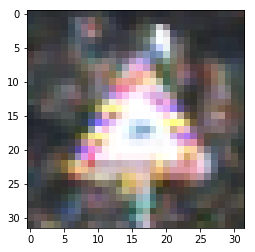

original -  Double curve TopKV2(values=array([ 0.44504043,  0.33385083,  0.16376635,  0.01941672,  0.01285261], dtype=float32), indices=array([26, 27, 21, 24, 18]))
Traffic signals, Pedestrians, Double curve, Road narrows on the right, General caution, 

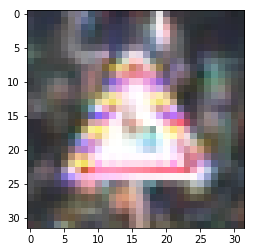

original -  Double curve TopKV2(values=array([ 0.92024952,  0.04257411,  0.03132818,  0.00229621,  0.00225388], dtype=float32), indices=array([23, 22, 19, 31, 21]))
Slippery road, Bumpy road, Dangerous curve to the left, Wild animals crossing, Double curve, 

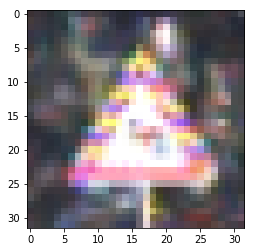

original -  Double curve TopKV2(values=array([ 0.52369791,  0.24696723,  0.11442798,  0.05896458,  0.02545944], dtype=float32), indices=array([24, 21, 19, 29, 31]))
Road narrows on the right, Double curve, Dangerous curve to the left, Bicycles crossing, Wild animals crossing, 

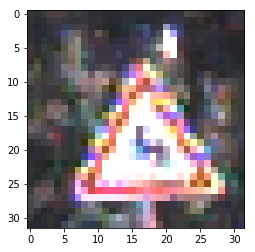

original -  Dangerous curve to the right TopKV2(values=array([ 0.42118958,  0.24857013,  0.07497825,  0.03776131,  0.03091379], dtype=float32), indices=array([ 1, 40, 27, 24,  4]))
Speed limit (30km/h), Roundabout mandatory, Pedestrians, Road narrows on the right, Speed limit (70km/h), 

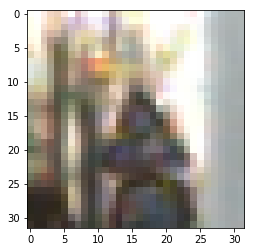

original -  Dangerous curve to the right TopKV2(values=array([ 0.72491419,  0.25183082,  0.01017436,  0.00548658,  0.00229239], dtype=float32), indices=array([27, 28, 14, 36, 29]))
Pedestrians, Children crossing, Stop, Go straight or right, Bicycles crossing, 

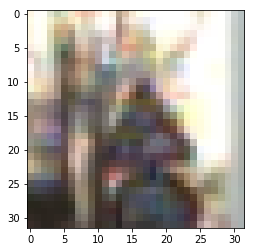

original -  Dangerous curve to the right TopKV2(values=array([ 0.62130266,  0.13437945,  0.07554592,  0.04667875,  0.02570497], dtype=float32), indices=array([30,  6, 28, 11, 26]))
Beware of ice/snow, End of speed limit (80km/h), Children crossing, Right-of-way at the next intersection, Traffic signals, 

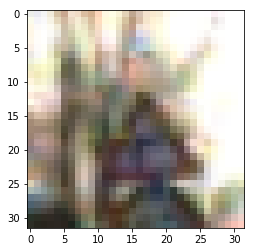

original -  Dangerous curve to the right TopKV2(values=array([ 0.43317765,  0.36952823,  0.0408534 ,  0.03769363,  0.02622669], dtype=float32), indices=array([38, 36, 11, 30, 28]))
Keep right, Go straight or right, Right-of-way at the next intersection, Beware of ice/snow, Children crossing, 

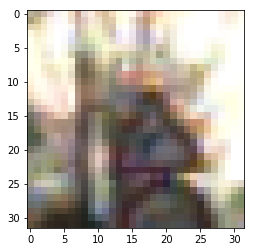

original -  Dangerous curve to the right TopKV2(values=array([ 0.42588374,  0.15401666,  0.10240509,  0.08173895,  0.06684022], dtype=float32), indices=array([30, 11, 25, 23, 20]))
Beware of ice/snow, Right-of-way at the next intersection, Road work, Slippery road, Dangerous curve to the right, 

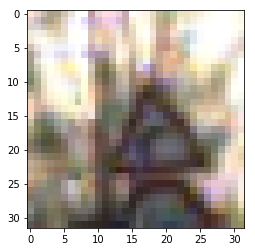

original -  Dangerous curve to the right TopKV2(values=array([ 0.50276798,  0.26206306,  0.13409294,  0.05693189,  0.0144764 ], dtype=float32), indices=array([23, 30, 11,  9, 20]))
Slippery road, Beware of ice/snow, Right-of-way at the next intersection, No passing, Dangerous curve to the right, 

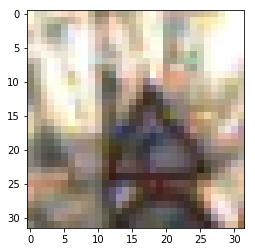

original -  Dangerous curve to the right TopKV2(values=array([  6.47793293e-01,   3.46274465e-01,   3.88193084e-03,
         1.61619671e-03,   2.27119497e-04], dtype=float32), indices=array([30, 20, 23, 26, 25]))
Beware of ice/snow, Dangerous curve to the right, Slippery road, Traffic signals, Road work, 

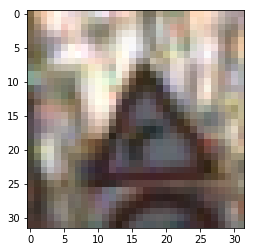

original -  Turn right ahead TopKV2(values=array([ 0.63592088,  0.08406758,  0.06969756,  0.05057153,  0.03313742], dtype=float32), indices=array([ 5, 13, 10,  6,  4]))
Speed limit (80km/h), Yield, No passing for vehicles over 3.5 metric tons, End of speed limit (80km/h), Speed limit (70km/h), 

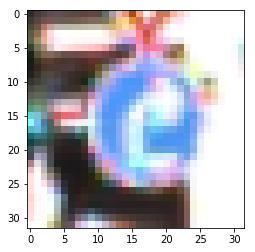

original -  Priority road TopKV2(values=array([ 0.76957989,  0.14929882,  0.0370607 ,  0.01071258,  0.00790658], dtype=float32), indices=array([12, 36, 29, 13, 33]))
Priority road, Go straight or right, Bicycles crossing, Yield, Turn right ahead, 

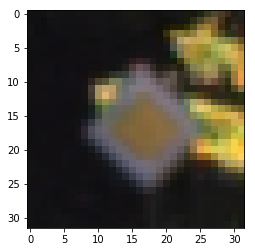

original -  Priority road TopKV2(values=array([  9.78709042e-01,   1.63796972e-02,   1.32058572e-03,
         9.95290582e-04,   7.91997416e-04], dtype=float32), indices=array([29, 12, 28, 24, 27]))
Bicycles crossing, Priority road, Children crossing, Road narrows on the right, Pedestrians, 

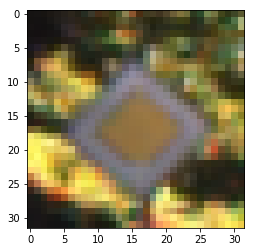

original -  Speed limit (50km/h) TopKV2(values=array([  6.49191856e-01,   3.01147997e-01,   4.53912057e-02,
         3.32778040e-03,   2.37020358e-04], dtype=float32), indices=array([ 2,  5,  3, 14, 15]))
Speed limit (50km/h), Speed limit (80km/h), Speed limit (60km/h), Stop, No vehicles, 

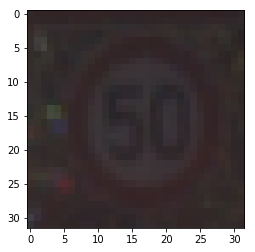

original -  Speed limit (50km/h) TopKV2(values=array([  9.90775764e-01,   9.09850374e-03,   1.00662182e-04,
         2.25715048e-05,   1.90701439e-06], dtype=float32), indices=array([1, 2, 4, 5, 0]))
Speed limit (30km/h), Speed limit (50km/h), Speed limit (70km/h), Speed limit (80km/h), Speed limit (20km/h), 

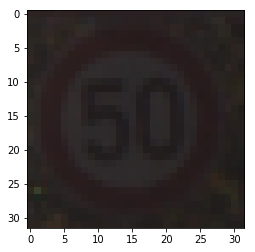

original -  Speed limit (50km/h) TopKV2(values=array([  6.02405548e-01,   3.97593528e-01,   9.24918425e-07,
         6.71444289e-11,   1.35432670e-12], dtype=float32), indices=array([2, 3, 5, 1, 9]))
Speed limit (50km/h), Speed limit (60km/h), Speed limit (80km/h), Speed limit (30km/h), No passing, 

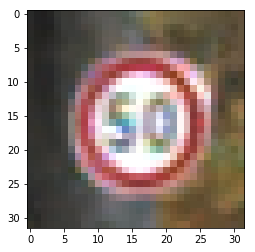

original -  Speed limit (50km/h) TopKV2(values=array([  7.76245415e-01,   1.59110859e-01,   6.46066889e-02,
         2.02189640e-05,   7.00822238e-06], dtype=float32), indices=array([ 5,  2,  3, 10,  8]))
Speed limit (80km/h), Speed limit (50km/h), Speed limit (60km/h), No passing for vehicles over 3.5 metric tons, Speed limit (120km/h), 

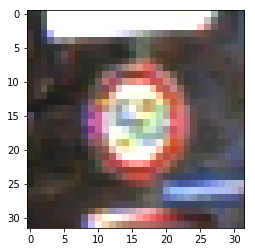

original -  Speed limit (50km/h) TopKV2(values=array([  9.86636698e-01,   9.71209630e-03,   3.65087599e-03,
         2.77877774e-07,   1.09871813e-07], dtype=float32), indices=array([ 3,  5,  2, 14,  9]))
Speed limit (60km/h), Speed limit (80km/h), Speed limit (50km/h), Stop, No passing, 

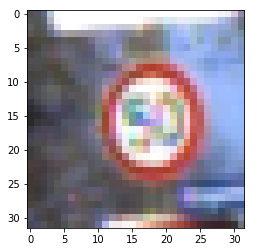

original -  Speed limit (50km/h) TopKV2(values=array([  9.83979940e-01,   1.24577256e-02,   2.22044927e-03,
         6.94708899e-04,   2.77196028e-04], dtype=float32), indices=array([ 0,  2,  1, 25,  4]))
Speed limit (20km/h), Speed limit (50km/h), Speed limit (30km/h), Road work, Speed limit (70km/h), 

original -  Road work TopKV2(values=array([ 0.45231339,  0.30939871,  0.06480329,  0.06201047,  0.05888077], dtype=float32), indices=array([11, 25, 30, 26, 27]))
Right-of-way at the next intersection, Road work, Beware of ice/snow, Traffic signals, Pedestrians, 

original -  Road work TopKV2(values=array([  9.02501702e-01,   5.97909428e-02,   3.49453986e-02,
         2.10979767e-03,   3.30088951e-04], dtype=float32), indices=array([11, 27, 21, 25, 26]))
Right-of-way at the next intersection, Pedestrians, Double curve, Road work, Traffic signals, 

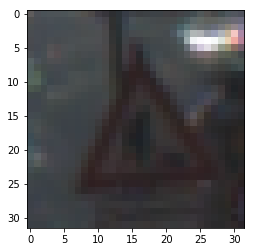

original -  Road work TopKV2(values=array([ 0.46575153,  0.29149655,  0.14792457,  0.03203591,  0.0168157 ], dtype=float32), indices=array([25, 11, 27, 18, 21]))
Road work, Right-of-way at the next intersection, Pedestrians, General caution, Double curve, 

original -  Road work TopKV2(values=array([  6.63910389e-01,   3.28250080e-01,   6.14658836e-03,
         6.26133347e-04,   4.94334963e-04], dtype=float32), indices=array([11, 25, 30, 27, 26]))
Right-of-way at the next intersection, Road work, Beware of ice/snow, Pedestrians, Traffic signals, 

original -  Road work TopKV2(values=array([  9.94123280e-01,   3.98956146e-03,   9.90354223e-04,
         4.68881917e-04,   2.38055552e-04], dtype=float32), indices=array([11, 27, 25, 28, 18]))
Right-of-way at the next intersection, Pedestrians, Road work, Children crossing, General caution, 

original -  Road work TopKV2(values=array([ 0.95877004,  0.02717389,  0.00901404,  0.00273299,  0.0015285 ], dtype=float32), indices=array([11, 21, 25, 30, 27]))
Right-of-way at the next intersection, Double curve, Road work, Beware of ice/snow, Pedestrians, 

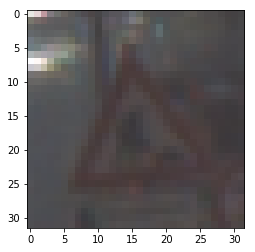

original -  Road work TopKV2(values=array([ 0.61181694,  0.27492326,  0.10094098,  0.009475  ,  0.00142717], dtype=float32), indices=array([25, 11, 27, 35, 33]))
Road work, Right-of-way at the next intersection, Pedestrians, Ahead only, Turn right ahead, 

original -  Road work TopKV2(values=array([  9.71925795e-01,   2.23408118e-02,   3.39421979e-03,
         1.68933230e-03,   3.24014167e-04], dtype=float32), indices=array([31, 25, 27, 18, 11]))
Wild animals crossing, Road work, Pedestrians, General caution, Right-of-way at the next intersection, 

original -  Road work TopKV2(values=array([ 0.60807669,  0.25899264,  0.11141176,  0.01549172,  0.00331198], dtype=float32), indices=array([25, 27, 11, 18, 31]))
Road work, Pedestrians, Right-of-way at the next intersection, General caution, Wild animals crossing, 

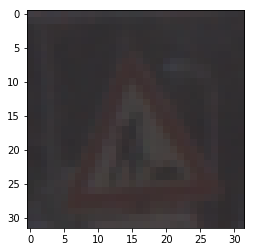

original -  Road work TopKV2(values=array([ 0.34900963,  0.28556108,  0.24849544,  0.08386958,  0.01816099], dtype=float32), indices=array([11, 25, 30, 27, 31]))
Right-of-way at the next intersection, Road work, Beware of ice/snow, Pedestrians, Wild animals crossing, 

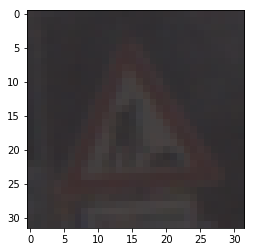

In [35]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    validation_accuracy = evaluate(data, y_test)
    training_accuracy = evaluate(X_train, y_train)
    res = sess.run(logits, feed_dict = {x: data, keep_prob: 1.0})
    arr = tf.placeholder(tf.float32, (None))
    topk = tf.nn.top_k(tf.nn.softmax(arr), k = 5)
    
    cp = sess.run(correct_prediction, feed_dict = {x: data, keep_prob: 1.0, y: y_test})
    
    print("Test Accuracy = {:.3f}".format(validation_accuracy))
    print("Train Accuracy = {:.3f}".format(training_accuracy))
    print(len(cp))
    for i in range(len(cp)):
        if cp[i] == False:
            topkvalues = sess.run(topk, feed_dict={arr: res[i]})
            print("original - ",signs[y_test[i]], topkvalues)
            for index in topkvalues.indices:
                print(signs[index], end=', ')
            plt.imshow(X_test[i])
            plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [20]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.show()

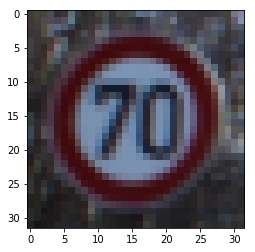

C:\Users\prudha\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


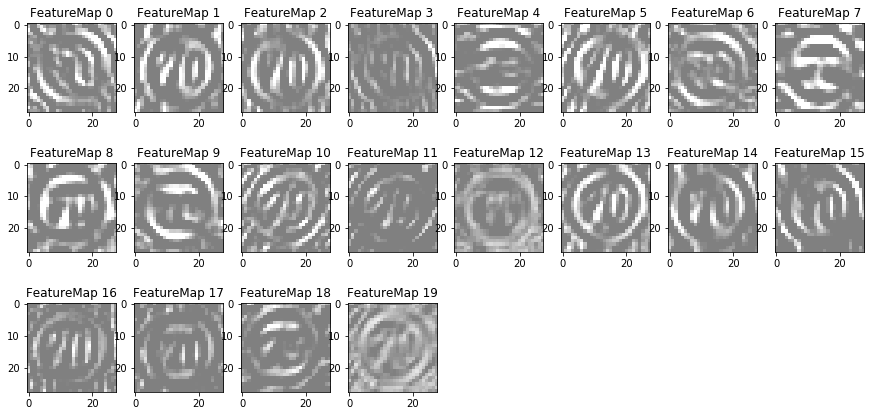

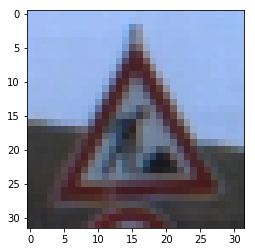

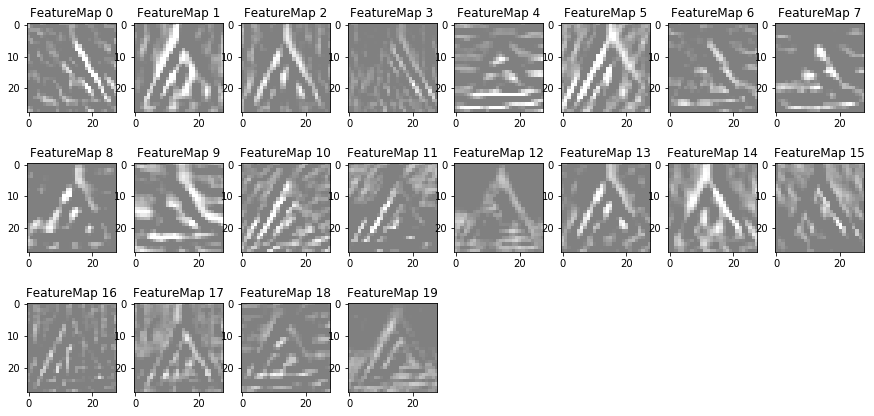

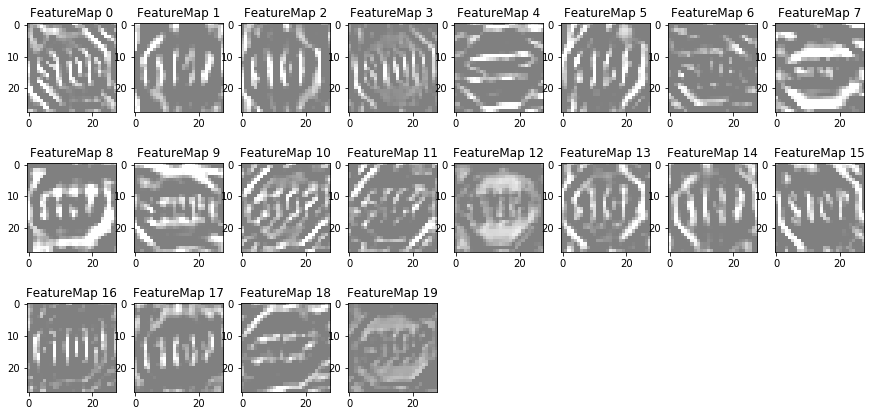

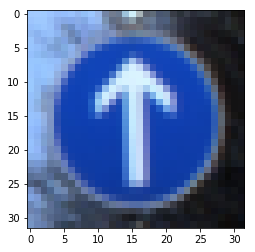

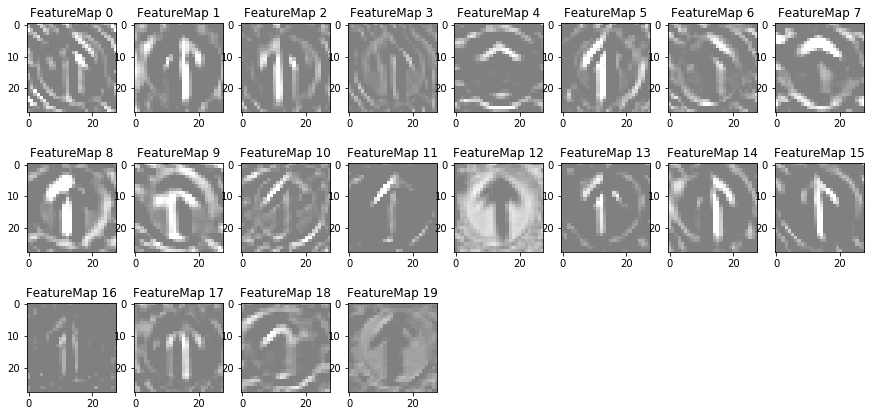

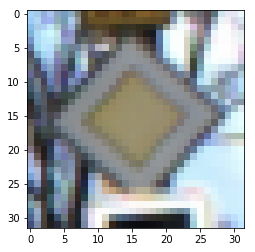

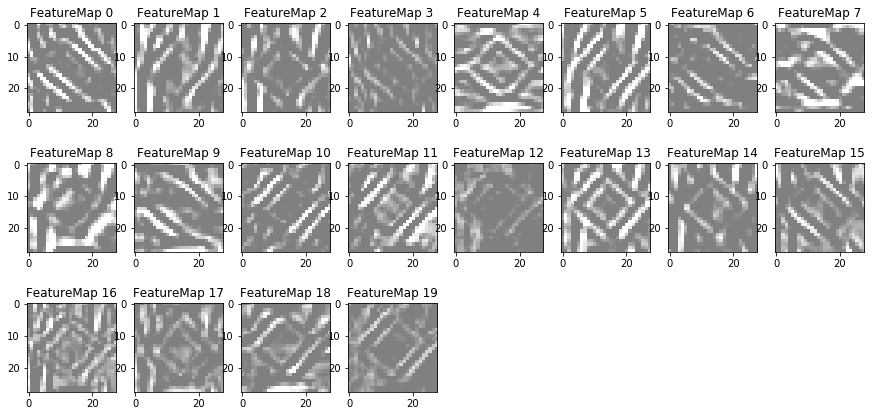

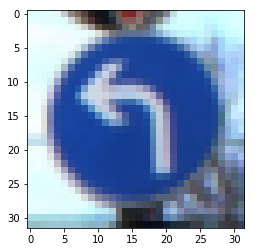

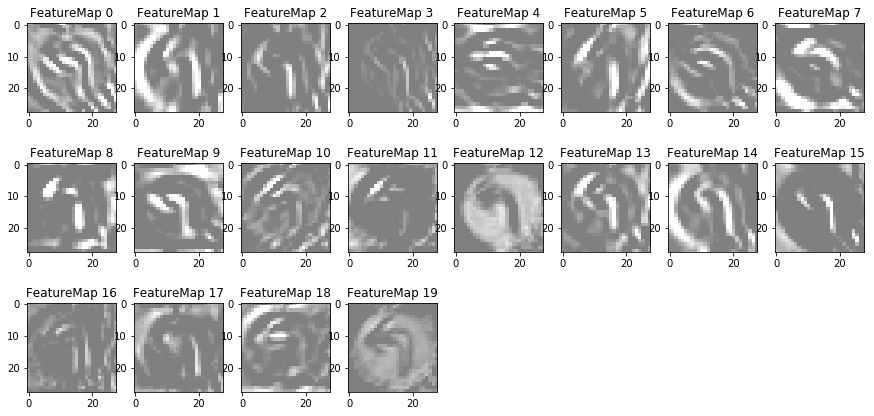

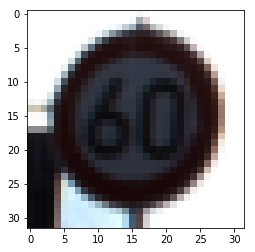

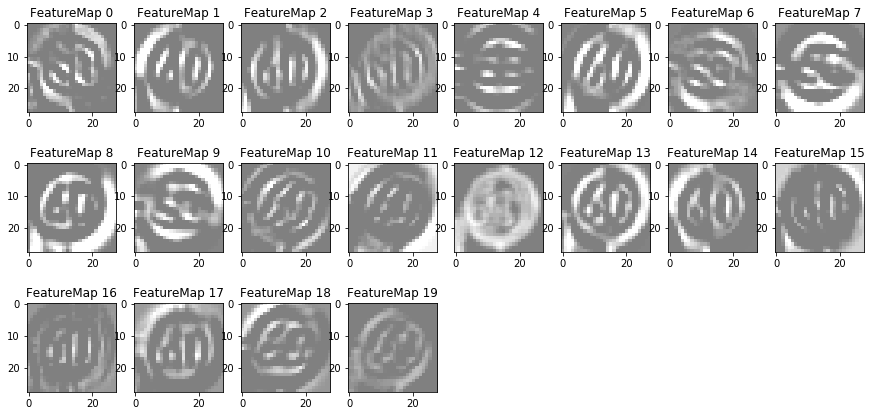

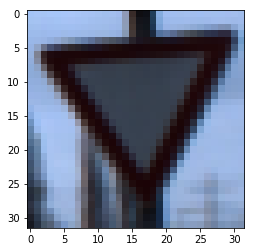

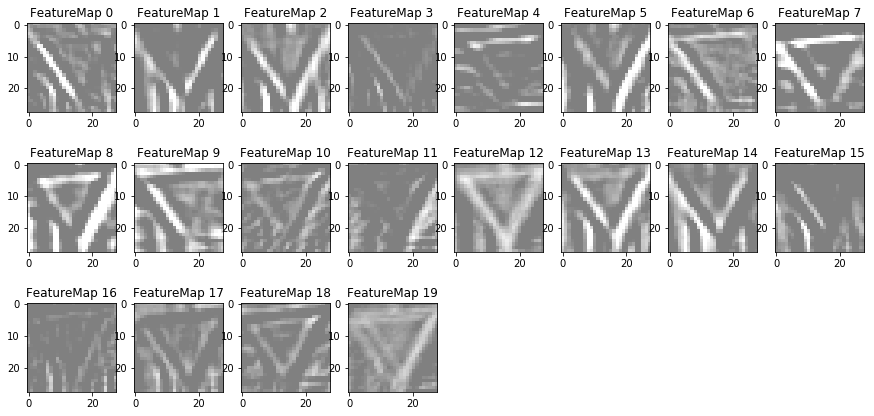

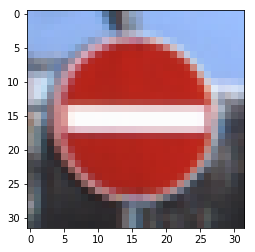

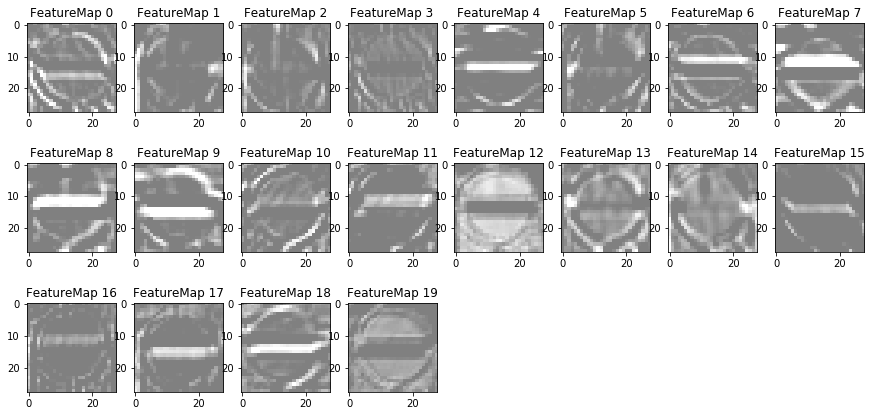

In [21]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    for i in range(len(imgs)):
        plt.imshow(imgs[i])
        plt.show()
        outputFeatureMap(prepocess_data(np.array(imgs[i:])), l1);